In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load Dataset

In [ ]:
path_file = '/content/drive/MyDrive/Bisa.AI/ulasan_roblox.csv'

In [ ]:
df = pd.read_csv(path_file)
df.head()

,userName,score,at,content
0,Pengguna Google,5,2025-09-08 13:10:36,ini pada kenapa ya Roblox kok aku GK bisa main...
1,Pengguna Google,5,2025-09-08 12:45:04,👍👍👍Baguss
2,Pengguna Google,1,2025-09-08 12:31:18,game burik 8bit cokkkkkk
3,Pengguna Google,1,2025-09-08 12:30:25,Wi-Fi nah no roblox
4,Pengguna Google,5,2025-09-08 12:13:40,seru


In [ ]:
df.shape

(10000, 4)

# Labelling

Label
- Positive rating >= 4
- Negative rating <= 2
- Netral rating selain diatas yaitu rating 3

In [ ]:
def label_score(score):
  if score >= 4:
    return 'Positive'
  elif score <= 2:
    return 'Negative'
  else:
    return 'Neutral'

df['label'] = df['score'].apply(label_score)

display(df.head())

,userName,score,at,content,label
0,Pengguna Google,5,2025-09-08 13:10:36,ini pada kenapa ya Roblox kok aku GK bisa main...,Positive
1,Pengguna Google,5,2025-09-08 12:45:04,👍👍👍Baguss,Positive
2,Pengguna Google,1,2025-09-08 12:31:18,game burik 8bit cokkkkkk,Negative
3,Pengguna Google,1,2025-09-08 12:30:25,Wi-Fi nah no roblox,Negative
4,Pengguna Google,5,2025-09-08 12:13:40,seru,Positive


# Preprocessing

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   userName  10000 non-null  object
 1   score     10000 non-null  int64 
 2   at        10000 non-null  object
 3   content   9999 non-null   object
 4   label     10000 non-null  object
dtypes: int64(1), object(4)
memory usage: 390.8+ KB


In [ ]:
#hapus kolom
df = df.drop(columns=['userName', 'score', 'at'],axis=1)
df.head()

,content,label
0,ini pada kenapa ya Roblox kok aku GK bisa main...,Positive
1,👍👍👍Baguss,Positive
2,game burik 8bit cokkkkkk,Negative
3,Wi-Fi nah no roblox,Negative
4,seru,Positive


In [ ]:
#cek missing value
df.isna().sum()

,0
content,1
label,0


In [ ]:
df['label'].value_counts()

,count
label,
Positive,8012
Negative,1581
Neutral,407


In [ ]:
#mapping
df['label'] = df['label'].map({'Positive': 0, 'Negative': 1, 'Neutral': 2})
df['label'].value_counts()

,count
label,
0,8012
1,1581
2,407


# text processing

In [ ]:
!pip install Sastrawi

In [ ]:
#download nltk
import nltk
import Sastrawi
from nltk.corpus import stopwords
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from nltk.tokenize import word_tokenize
import string
import re

In [ ]:
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('punkt_tab')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [ ]:
#lower case
df['content'] = df['content'].str.lower()
df.head()

,content,label
0,ini pada kenapa ya roblox kok aku gk bisa main...,0
1,👍👍👍baguss,0
2,game burik 8bit cokkkkkk,1
3,wi-fi nah no roblox,1
4,seru,0


In [ ]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [ ]:
import string
import re

# Drop rows with missing values in the 'content' column
df.dropna(subset=['content'], inplace=True)

# menghapus punct
df['content'] = df['content'].apply(lambda x: [c for c in x if c not in string.punctuation])

# menggabungkan list menjadi string
df['content'] = df['content'].apply(lambda x: ''.join(x))

# menghapus link http
pattern = re.compile(r'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\\(\\),]|(?:%[0-9a-fA-F]{2}))+')
df['content'] = df['content'].apply(lambda x: re.sub(pattern, '', x))

# membaca dataset
display(df.head())

,content,label
0,ini pada kenapa ya roblox kok aku gk bisa main...,0
1,👍👍👍baguss,0
2,game burik 8bit cokkkkkk,1
3,wifi nah no roblox,1
4,seru,0


In [ ]:
# slang word
slang = '/content/drive/MyDrive/Codingan stupen py/EDA/new_kamusalay.csv'
sw = open(slang, encoding= 'utf-8', errors='ignore', mode='r');SlangS = sw.readlines();sw.close
SlangS = {slang.strip().split(',')[0]:slang.strip().split(',')[1] for slang in SlangS}

#balik ke dataframe
df['content'] = df['content'].apply(lambda x: ' '.join([SlangS[word] if word in SlangS else word for word in x.split()]))
df.head()

,content,label
0,ini pada kenapa ya roblox kok aku tidak bisa m...,0
1,👍👍👍baguss,0
2,game burik 8bit cokkkkkk,1
3,wifi nah no roblox,1
4,seru,0


In [ ]:
#kamus stopwords bahasa indonesia
stop_words = set(stopwords.words('indonesian'))

#tokenisasi
df['content'] = df['content'].apply(word_tokenize)
df.head()

#stopwords
df['content'] = df['content'].apply(lambda x: [word for word in x if word not in stop_words])
df.head()

#stemming
factory = StemmerFactory()
stemmer = factory.create_stemmer()
df['content'] = df['content'].apply(lambda x: [stemmer.stem(word) for word in x])
df.head()

,content,label
0,"[ya, roblox, main, jaring, lancar, suka, kali,...",0
1,[baguss],0
2,"[game, burik, 8bit, cokkkkkk]",1
3,"[wifi, no, roblox]",1
4,[seru],0


In [ ]:
df.shape

(9999, 2)

In [ ]:
#save data
df.to_csv('/content/drive/MyDrive/Bisa.AI/ulasan_roblox_bersih.csv', index=False)

# Word Count

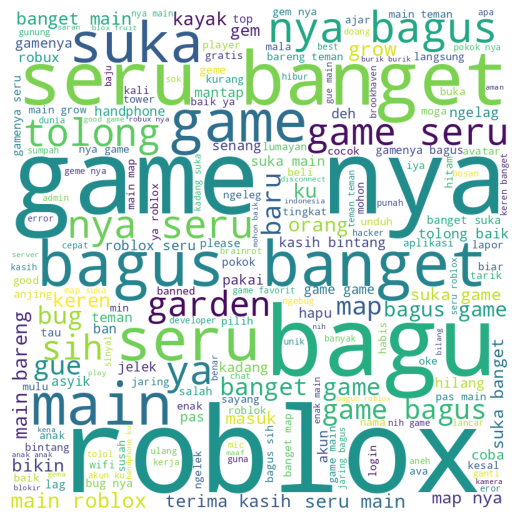

In [ ]:
from wordcloud import WordCloud

# Join all the words in the 'content' column into a single string
all_words = ' '.join([word for tokens in df['content'] for word in tokens])

# Create a WordCloud object
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                min_font_size = 10).generate(all_words)

# Display the generated wordcloud image
plt.figure(figsize = (5, 5), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()

# Sampling

In [ ]:
#sampling ke mengikuti kelas yang tertinggi
class_0 = df[df['label']==0]
class_1 = df[df['label']==1].sample(len(class_0), replace=True)
class_2 = df[df['label']==2].sample(len(class_0), replace=True)

df_balanced = pd.concat([class_0, class_1, class_2], axis=0)

#shuffle
df_balanced = df_balanced.sample(frac=1, random_state=42).reset_index(drop=True)

print("jumlah data:", df_balanced.shape)
print(df_balanced['label'].value_counts())
df_balanced.head()

jumlah data: (24033, 2)
label
2    8011
0    8011
1    8011
Name: count, dtype: int64


,content,label
0,"[bagustapi, ngubah, email, masuk, sandi, salah]",2
1,"[game, manfaat, pro, player, obby, game, seru,...",0
2,"[oi, , nih, suka, maca atau, suka, kopi, pilih...",0
3,"[developer, tolong, akun, pakein, passkes, tul...",2
4,[burik],1


# Train test

In [ ]:
#split untuk menggunakan lstm
from sklearn.model_selection import train_test_split

X = df_balanced['content'] #sebagai kolom fitur
y = df_balanced['label'] #sebagai kolom target

print(len(X), len(y))

24033 24033


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Feature Exct

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# inisialisasi tokenisasi
tokenizer = Tokenizer(num_words=5000, oov_token="<OOV>") # Gunakan 5000 kata yang sering muncul

# sesuaikan tokenisasi dengan data latih
tokenizer.fit_on_texts(X_train)

# ubah teks menjadi urutan
X_train_sequences = tokenizer.texts_to_sequences(X_train)
X_test_sequences = tokenizer.texts_to_sequences(X_test)

# Tentukan panjang urutan maksimum
max_length = max([len(x) for x in X_train_sequences])

X_train_padded = pad_sequences(X_train_sequences, maxlen=max_length, padding='post', truncating='post')
X_test_padded = pad_sequences(X_test_sequences, maxlen=max_length, padding='post', truncating='post')

print("Original X_train shape:", X_train.shape)
print("Padded X_train shape:", X_train_padded.shape)
print("Original X_test shape:", X_test.shape)
print("Padded X_test shape:", X_test_padded.shape)

Original X_train shape: (16823,)
Padded X_train shape: (16823, 90)
Original X_test shape: (7210,)
Padded X_test shape: (7210, 90)


In [ ]:
# save tokenisasi
import pickle as pkl

with open('/content/drive/MyDrive/Bisa.AI/tokenizer_roblox.pkl', 'wb') as f:
    pkl.dump(tokenizer, f)

# Encoding

In [ ]:
from tensorflow.keras.utils import to_categorical

# konversi menjadi one hot untuk label target
y_train_cat = to_categorical(y_train, num_classes=3)
y_test_cat = to_categorical(y_test, num_classes=3)

In [ ]:
print('encoding data latih:', y_train_cat.shape)
print('encoding data test:', y_test_cat.shape)

encoding data latih: (16823, 3)
encoding data test: (7210, 3)


In [ ]:
y_train_cat

array([[1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       ...,
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.]])

# Membuat arsitektur LSTM

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Embedding, Dropout, Bidirectional

vocab_size = 5000 # definisi kamus sesuai dengan jumlah tokenisasi

# diubah jadi vektor angka sepanjang 128 elemen
embedding_dim = 128

# Membuat model sequential untuk layer dilatih secara berurutan
model = Sequential()

# menambahkan embeding layer sebagai layer pertama/input
model.add(Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=max_length))

# heddien layer
# menambahkan layer bilstm dengan 64 unit dibungkus Bidirectional (baca teks dari depan & belakang).
model.add(Bidirectional(LSTM(64, return_sequences=True, recurrent_dropout=0.2))) # drop 20% koneksi internal LSTM biar ga overfitting.
model.add(Dropout(0.3)) # Buat mencegah overfitting dengan mematikan/membuang 30% neuron secara acak saat training

# menambahkan layer bilstm dengan 32 unit dibungkus Bidirectional (baca teks dari depan & belakang).
model.add(Bidirectional(LSTM(32, recurrent_dropout=0.2))) # drop 20% koneksi internal LSTM biar ga overfitting.
model.add(Dropout(0.3)) # Buat mencegah overfitting dengan mematikan/membuang 30% neuron secara acak saat training


# Output layer
# bikin output layer buat klasifikasi 3 kelas, outputnya berupa probabilitas tiap kelas.
# fungsi aktivasi yang dipakai di output layer untuk klasifikasi multi-kelas.
# softmax = bikin output layer bisa kasih prediksi kelas dalam bentuk probabilitas.
model.add(Dense(3, activation='softmax'))

# nge-set bentuk input model (batch size fleksibel, panjang input = max_length) supaya model siap dipakai/training.
model.build(input_shape=(None, max_length))
# Menampilkan model summary
model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ (None, 90, 128)        │       640,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_2 (Bidirectional) │ (None, 90, 128)        │        98,816 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 90, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_3 (Bidirectional) │ (None, 64)             │        41,216 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │           195 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 780,227 (2.98 MB)

 Trainable params: 780,227 (2.98 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
#compile model
model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

# Train model

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

# mendefinisikan earlystopping
# Menghentikan training model jika tidak membaik/meningkan selama 3 epoch,
callbacks = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True) # menambahkan restore_best untuk model balik ke bobot terbaik yang pernah dicapai

# Latih model
history = model.fit(
    X_train_padded, # Data training (input) yang sudah dipadding supaya panjang sequence sama.
    y_train_cat, # Label training yang sudah di-oversample dan one-hot encoded.
    validation_data=(X_test_padded, y_test_cat), # Data validasi (input & label) asli, dipakai buat ngecek performa model tiap epoch dari data latih.
    epochs=50, # Maksimal jumlah epoch training. Bisa dihentikan lebih awal karena EarlyStopping
    batch_size=16, # Jumlah sampel yang diproses sekali forward/backprop sebelum update bobot. semakin kecil semakin baik model bekerja
    callbacks=[callbacks] # Memasukan fungsi earlyestop untuk memberhentikan secara otomatis
)

Epoch 1/50
1052/1052 ━━━━━━━━━━━━━━━━━━━━ 364s 335ms/step - accuracy: 0.6400 - loss: 0.7743 - val_accuracy: 0.8746 - val_loss: 0.3679
Epoch 2/50
1052/1052 ━━━━━━━━━━━━━━━━━━━━ 361s 315ms/step - accuracy: 0.8884 - loss: 0.3269 - val_accuracy: 0.9040 - val_loss: 0.2916
Epoch 3/50
1052/1052 ━━━━━━━━━━━━━━━━━━━━ 351s 334ms/step - accuracy: 0.9185 - loss: 0.2439 - val_accuracy: 0.9036 - val_loss: 0.2800
Epoch 4/50
1052/1052 ━━━━━━━━━━━━━━━━━━━━ 363s 316ms/step - accuracy: 0.9271 - loss: 0.2123 - val_accuracy: 0.8967 - val_loss: 0.3067
Epoch 5/50
1052/1052 ━━━━━━━━━━━━━━━━━━━━ 402s 336ms/step - accuracy: 0.9316 - loss: 0.1975 - val_accuracy: 0.9190 - val_loss: 0.2509
Epoch 6/50
1052/1052 ━━━━━━━━━━━━━━━━━━━━ 380s 334ms/step - accuracy: 0.9434 - loss: 0.1602 - val_accuracy: 0.9190 - val_loss: 0.2442
Epoch 7/50
1052/1052 ━━━━━━━━━━━━━━━━━━━━ 382s 334ms/step - accuracy: 0.9429 - loss: 0.1554 - val_accuracy: 0.9257 - val_loss: 0.2584
Epoch 8/50
1052/1052 ━━━━━━━━━━━━━━━━━━━━ 363s 317ms/step - ac

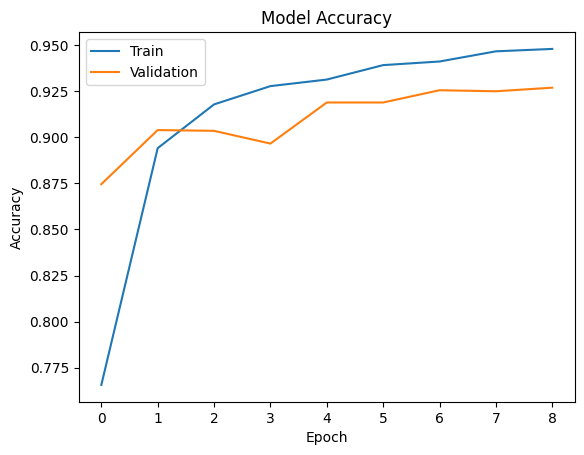

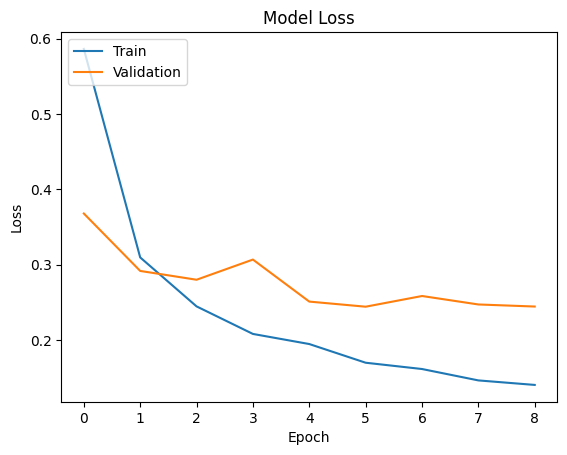

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Evaluasi

In [ ]:
##simpan model
model.save('/content/drive/MyDrive/Bisa.AI/model_lstm.h5')

In [ ]:
#load model
from tensorflow.keras.models import load_model

model = load_model('/content/drive/MyDrive/Bisa.AI/model_lstm.h5')
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ (None, 90, 128)        │       640,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_2 (Bidirectional) │ (None, 90, 128)        │        98,816 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 90, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_3 (Bidirectional) │ (None, 64)             │        41,216 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │           195 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 780,229 (2.98 MB)

 Trainable params: 780,227 (2.98 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

In [ ]:
#evaluasi untuk data test
loss, accuracy = model.evaluate(X_test_padded, y_test_cat)
print(f'Test Loss: {loss:.4f}')
print(f'Test Accuracy: {accuracy:.4f}')

226/226 ━━━━━━━━━━━━━━━━━━━━ 18s 70ms/step - accuracy: 0.9271 - loss: 0.2232
Test Loss: 0.2442
Test Accuracy: 0.9190


In [ ]:
#evaluasi metrik
from sklearn.metrics import classification_report, confusion_matrix

# prediksi model pada data tes
y_pred = model.predict(X_test_padded)
Y_pred = np.argmax(y_pred, axis=1)
Y_test = np.argmax(y_test_cat, axis=1)

# classification report
print(classification_report(Y_test, Y_pred))

226/226 ━━━━━━━━━━━━━━━━━━━━ 20s 81ms/step
              precision    recall  f1-score   support

           0       0.89      0.92      0.90      2452
           1       0.94      0.90      0.92      2376
           2       0.93      0.94      0.93      2382

    accuracy                           0.92      7210
   macro avg       0.92      0.92      0.92      7210
weighted avg       0.92      0.92      0.92      7210



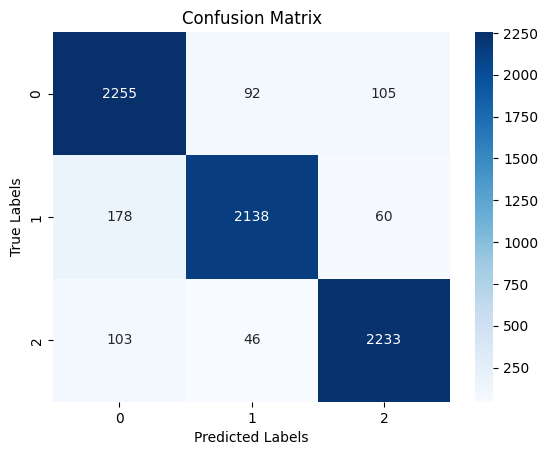

In [ ]:
import seaborn as sns

cm = confusion_matrix(Y_test, Y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [ ]:
#save model menggunakan format h5
model.save('/content/drive/MyDrive/Bisa.AI/model/model_lstm.h5')